Full Code Repository is available on my [GitHub](https://github.com/adriendinzey/Pokemon-Machine-Learning-Analysis)

# **Pokémon "Hidden" Archetypes**
#### *An Analysis on Pokémon using Machine Learning Techniques*

![](images/ballwithcards.jpg)

Have you ever noticed that in some video games, no matter the genre, characters tend to follow certain "archetypes" in battle? For example, you might have a beefy, strong but slow character, a precise, high-damage character or a speedy but weak character. To go one step further, have you ever noticed that when the concept of "types" or "elements" are involved, these archetypes are even more common? For example, you would imagine a rock-character to be a big golem, a slow and heavy character with lots of health points and defensive stats. Or you might imagine a fire-character, someone with lots of explosive power, but subpar health and defensive stats. Maybe you have seen lightning-based characters thatfds 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from scipy import stats 

In [3]:
df = pd.read_csv('Pokemon.csv',keep_default_na=False)
df = df.drop_duplicates(subset=['number'])
df = df.reset_index(drop=True)
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,Regieleki,Electric,,580,80,100,50,100,50,200,8,True
894,895,Regidrago,Dragon,,580,200,100,50,100,50,80,8,True
895,896,Glastrier,Ice,,580,100,145,130,65,110,30,8,True
896,897,Spectrier,Ghost,,580,100,65,60,145,80,130,8,True


In [4]:
battle_cols=df.columns[5:11]
for col in battle_cols:
    df[col]=df[col]/df['total']
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,1,False
1,2,Ivysaur,Grass,Poison,405,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,1,False
2,3,Venusaur,Grass,Poison,525,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,1,False
3,4,Charmander,Fire,,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False
4,5,Charmeleon,Fire,,405,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,Regieleki,Electric,,580,0.137931,0.172414,0.086207,0.172414,0.086207,0.344828,8,True
894,895,Regidrago,Dragon,,580,0.344828,0.172414,0.086207,0.172414,0.086207,0.137931,8,True
895,896,Glastrier,Ice,,580,0.172414,0.250000,0.224138,0.112069,0.189655,0.051724,8,True
896,897,Spectrier,Ghost,,580,0.172414,0.112069,0.103448,0.250000,0.137931,0.224138,8,True


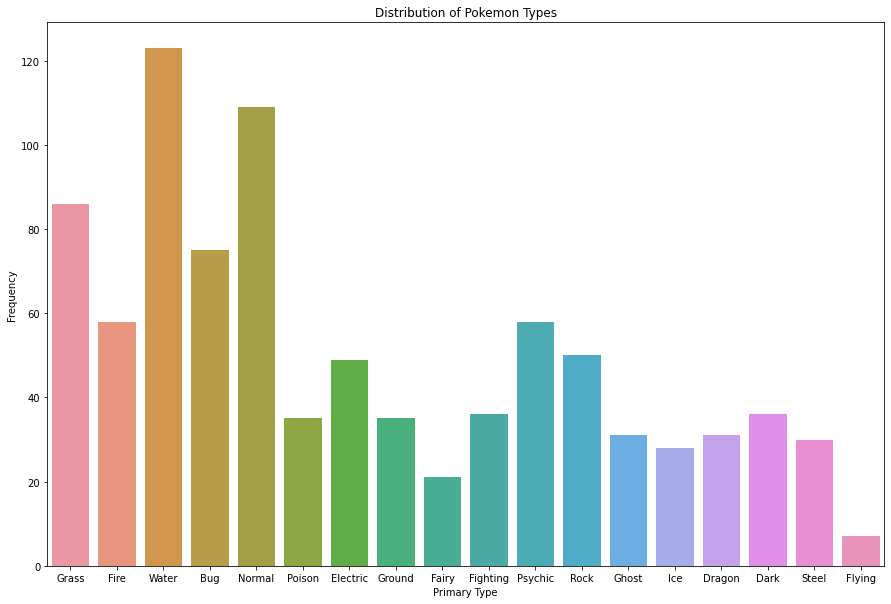

In [5]:
plt.figure(figsize=(15,10))
fig=sns.countplot(x='type1',data=df)
fig.set(xlabel='Primary Type',ylabel='Frequency',title="Distribution of Pokemon Types")
plt.show(fig)

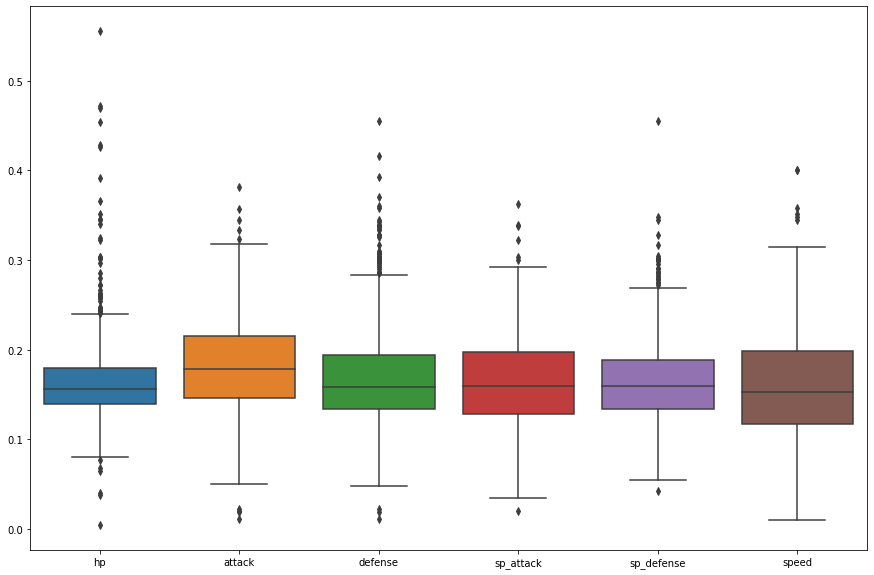

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,4,Charmander,Fire,,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False
1,5,Charmeleon,Fire,,405,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1,False
2,7,Squirtle,Water,,314,0.140127,0.152866,0.207006,0.159236,0.203822,0.136943,1,False
3,8,Wartortle,Water,,405,0.145679,0.155556,0.197531,0.160494,0.197531,0.143210,1,False
4,9,Blastoise,Water,,530,0.149057,0.156604,0.188679,0.160377,0.198113,0.147170,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,891,Kubfu,Fighting,,385,0.155844,0.233766,0.155844,0.137662,0.129870,0.187013,8,True
452,894,Regieleki,Electric,,580,0.137931,0.172414,0.086207,0.172414,0.086207,0.344828,8,True
453,895,Regidrago,Dragon,,580,0.344828,0.172414,0.086207,0.172414,0.086207,0.137931,8,True
454,896,Glastrier,Ice,,580,0.172414,0.250000,0.224138,0.112069,0.189655,0.051724,8,True


In [6]:
cols=list(df.columns[5:11])
battle_stats=df[cols]
plt.figure(figsize=(15,10))
fig=sns.boxplot(data=battle_stats)
plt.show(fig)
pure_df=df[df['type2']=='']
pure_df = pure_df.reset_index(drop=True)
pure_df


In [7]:
for col in cols:
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df = df[df[col] < upper] 
    df = df[df[col] > lower]  


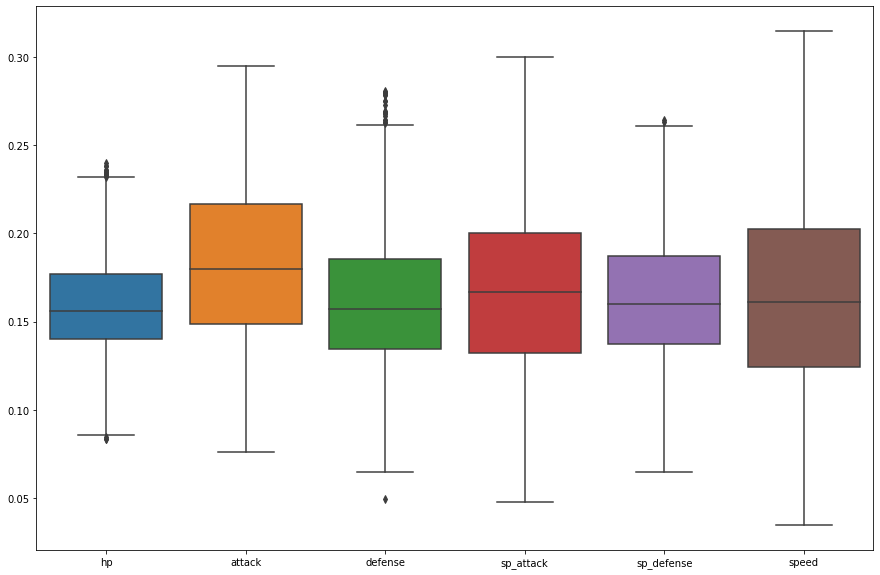

In [8]:
cols=list(df.columns[5:11])
battle_stats=df[cols]
plt.figure(figsize=(15,10))
fig=sns.boxplot(data=battle_stats)
plt.show(fig)

In [9]:
battle_stats.describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,0.159656,0.182843,0.163788,0.167095,0.163029,0.163680
std,0.029690,0.044405,0.039927,0.044262,0.036166,0.053418
min,0.083333,0.075758,0.049180,0.047619,0.064912,0.034483
25%,0.140064,0.148886,0.134237,0.132395,0.137169,0.124307
50%,0.156250,0.180000,0.157182,0.166667,0.160000,0.161290
75%,0.176777,0.216667,0.185567,0.200000,0.187016,0.202532
max,0.240000,0.295082,0.280528,0.300000,0.264151,0.314815


In [10]:
cov_mat=battle_stats.cov()
cov_mat

,hp,attack,defense,sp_attack,sp_defense,speed
hp,0.000882,0.000070,0.000025,-0.000313,-0.000139,-0.000525
attack,0.000070,0.001972,0.000042,-0.000878,-0.000860,-0.000339
defense,0.000025,0.000042,0.001594,-0.000672,0.000159,-0.001149
sp_attack,-0.000313,-0.000878,-0.000672,0.001959,0.000139,-0.000235
sp_defense,-0.000139,-0.000860,0.000159,0.000139,0.001308,-0.000605
speed,-0.000525,-0.000339,-0.001149,-0.000235,-0.000605,0.002854


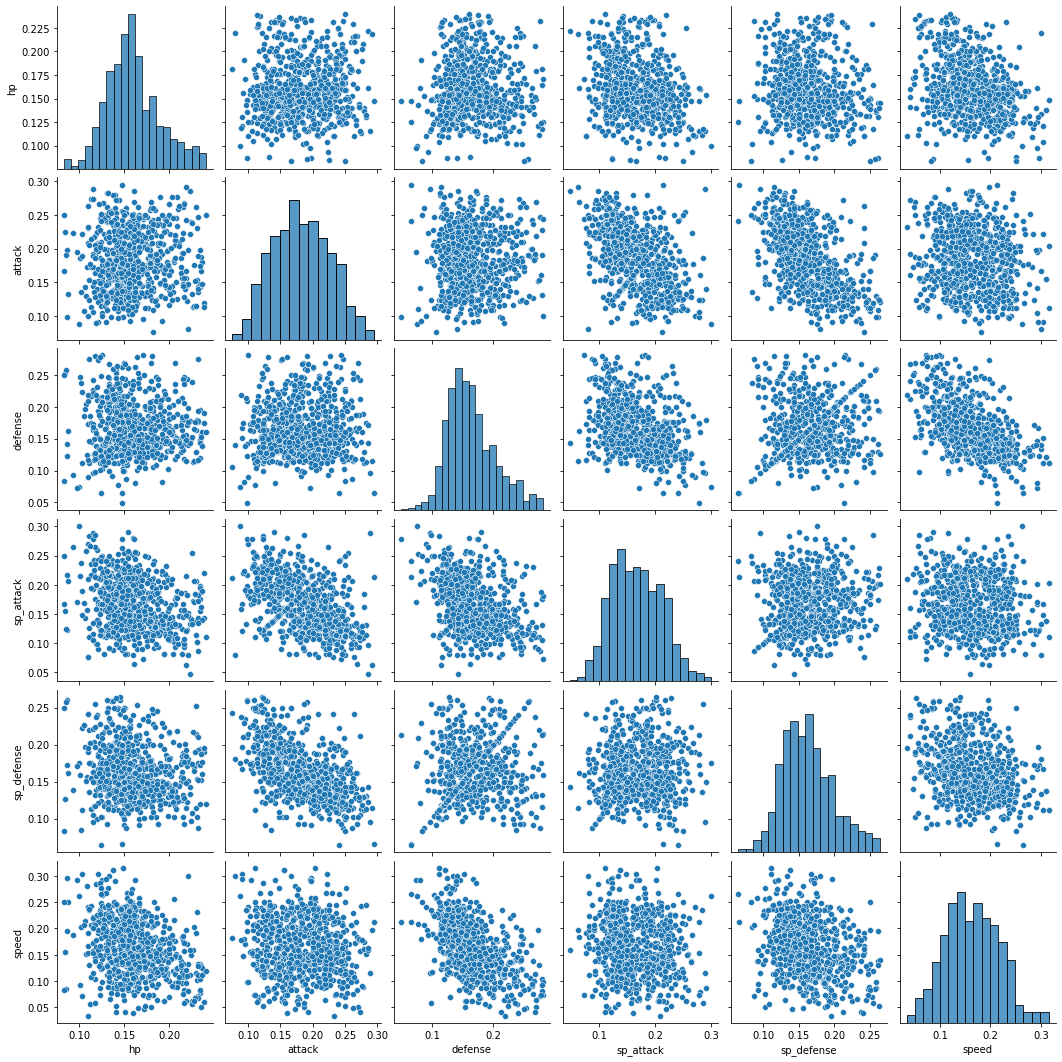

In [11]:
sns.pairplot(battle_stats)

In [12]:
pure_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,4,Charmander,Fire,,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False
1,5,Charmeleon,Fire,,405,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1,False
2,7,Squirtle,Water,,314,0.140127,0.152866,0.207006,0.159236,0.203822,0.136943,1,False
3,8,Wartortle,Water,,405,0.145679,0.155556,0.197531,0.160494,0.197531,0.143210,1,False
4,9,Blastoise,Water,,530,0.149057,0.156604,0.188679,0.160377,0.198113,0.147170,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,891,Kubfu,Fighting,,385,0.155844,0.233766,0.155844,0.137662,0.129870,0.187013,8,True
452,894,Regieleki,Electric,,580,0.137931,0.172414,0.086207,0.172414,0.086207,0.344828,8,True
453,895,Regidrago,Dragon,,580,0.344828,0.172414,0.086207,0.172414,0.086207,0.137931,8,True
454,896,Glastrier,Ice,,580,0.172414,0.250000,0.224138,0.112069,0.189655,0.051724,8,True


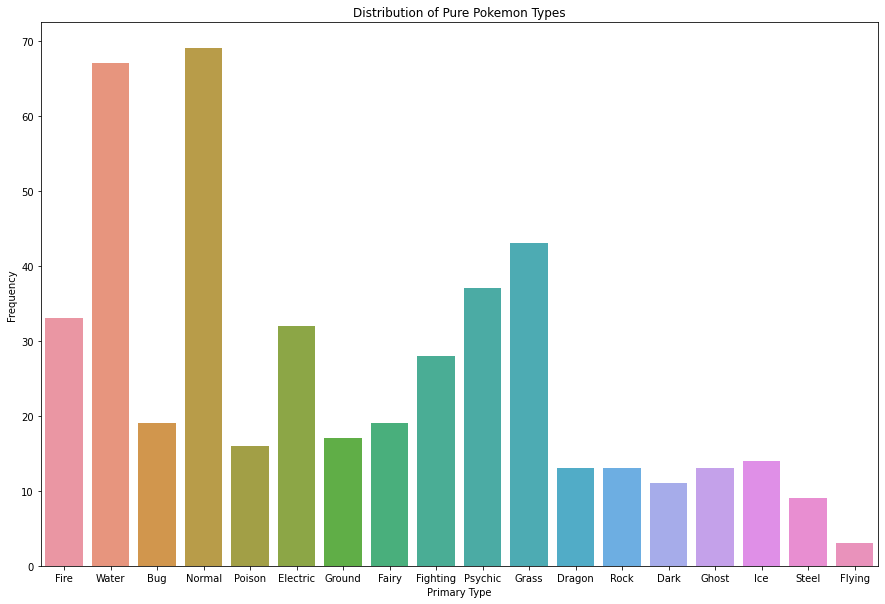

In [13]:
plt.figure(figsize=(15,10))
fig=sns.countplot(x='type1',data=pure_df)
fig.set(xlabel='Primary Type',ylabel='Frequency',title="Distribution of Pure Pokemon Types")
plt.show(fig)

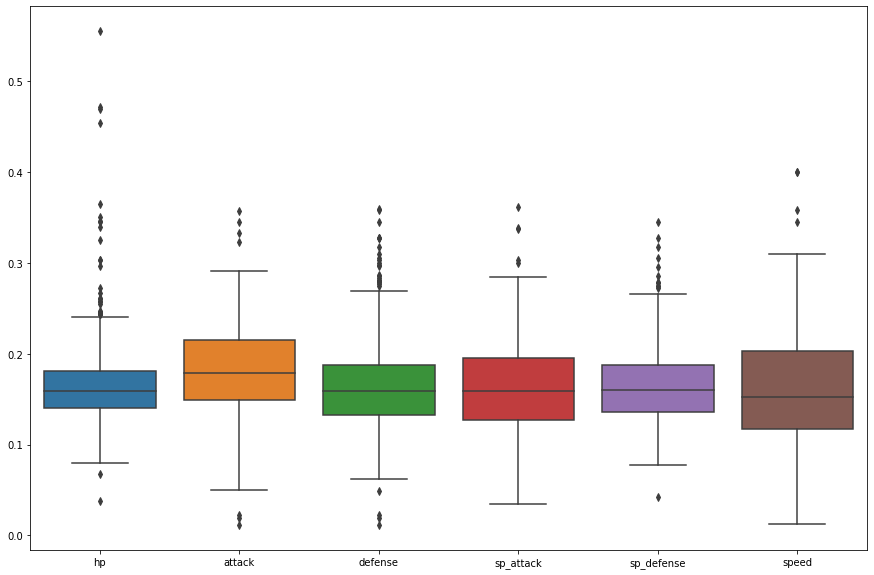

In [14]:
cols=list(pure_df.columns[5:11])
pure_stats=pure_df[cols]
plt.figure(figsize=(15,10))
fig=sns.boxplot(data=pure_stats)
plt.show(fig)

In [15]:
for col in cols:
    q25, q75 = np.percentile(pure_stats[col], 25), np.percentile(pure_stats[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    pure_df = pure_df[pure_df[col] < upper] 
    pure_df = pure_df[pure_df[col] > lower]  

    

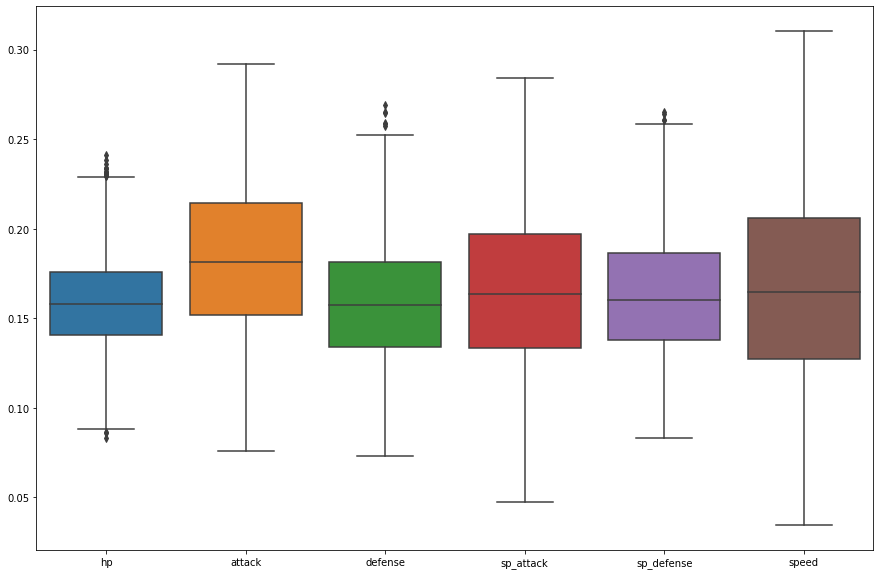

In [16]:
pure_stats=pure_df[cols]
plt.figure(figsize=(15,10))
fig=sns.boxplot(data=pure_stats)
plt.show(fig)


In [17]:
pure_stats.describe()

,hp,attack,defense,sp_attack,sp_defense,speed
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,0.159900,0.183619,0.161868,0.164946,0.163574,0.166093
std,0.030002,0.044587,0.036445,0.043023,0.035755,0.053912
min,0.083333,0.075758,0.073171,0.047619,0.083333,0.034483
25%,0.140625,0.151976,0.134146,0.133333,0.137931,0.127389
50%,0.157895,0.181416,0.157534,0.163265,0.160377,0.164706
75%,0.176056,0.214433,0.181598,0.197222,0.186335,0.205882
max,0.240964,0.291667,0.269231,0.284314,0.265306,0.310345


In [18]:
cov_mat=pure_stats.cov()
cov_mat


,hp,attack,defense,sp_attack,sp_defense,speed
hp,0.000900,0.000070,0.000114,-0.000330,-0.000109,-0.000644
attack,0.000070,0.001988,0.000061,-0.000863,-0.000859,-0.000397
defense,0.000114,0.000061,0.001328,-0.000533,0.000090,-0.001059
sp_attack,-0.000330,-0.000863,-0.000533,0.001851,0.000140,-0.000265
sp_defense,-0.000109,-0.000859,0.000090,0.000140,0.001278,-0.000541
speed,-0.000644,-0.000397,-0.001059,-0.000265,-0.000541,0.002906


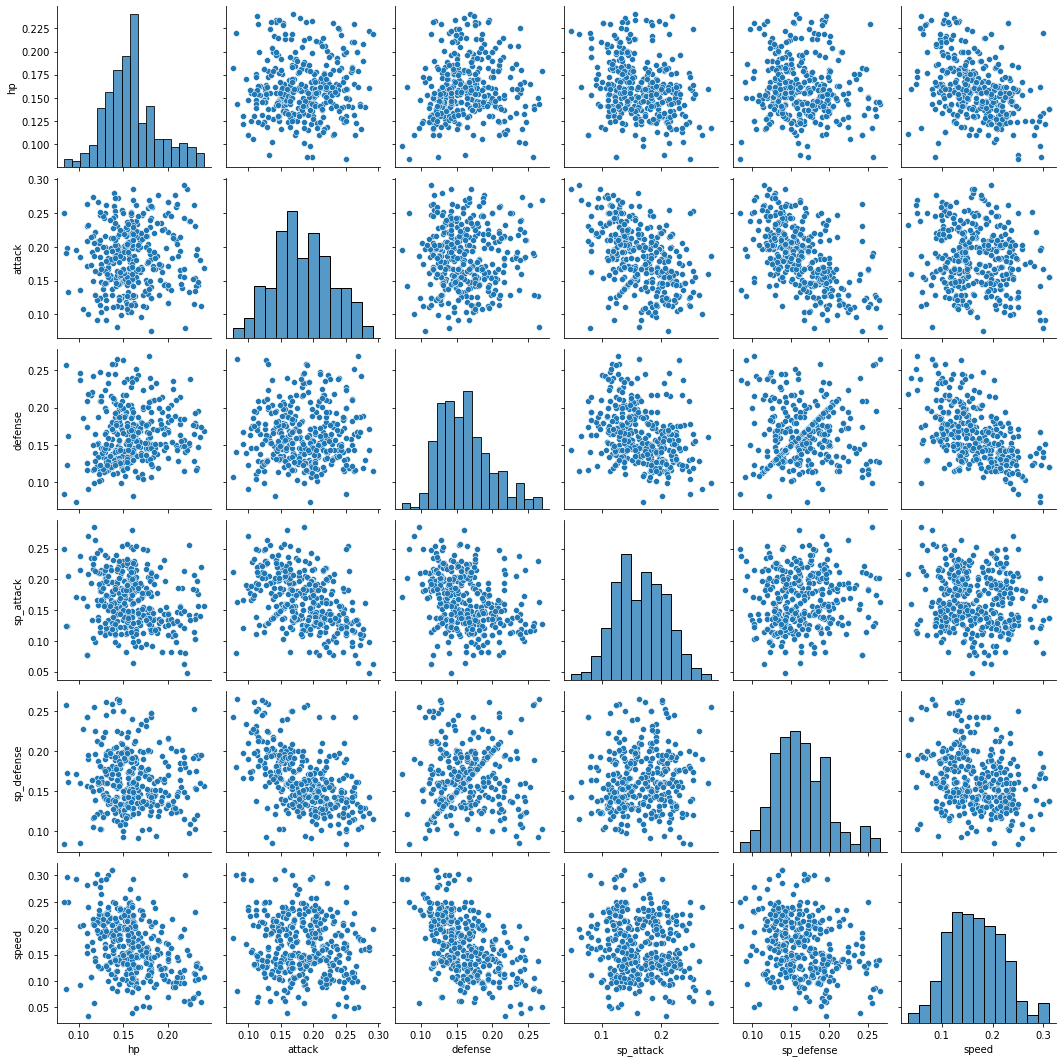

In [19]:
sns.pairplot(pure_stats)

In [20]:
for col in cols:
    shapiro_test = stats.shapiro(pure_stats[col])
    print(shapiro_test)

ShapiroResult(statistic=0.9741064310073853, pvalue=2.031649728451157e-06)
ShapiroResult(statistic=0.9903718829154968, pvalue=0.011999256908893585)
ShapiroResult(statistic=0.9700005054473877, pvalue=3.563248753835069e-07)
ShapiroResult(statistic=0.9924943447113037, pvalue=0.04792152717709541)
ShapiroResult(statistic=0.9727322459220886, pvalue=1.1170828884132789e-06)
ShapiroResult(statistic=0.9910305738449097, pvalue=0.018365293741226196)


In [21]:
X = pure_df.iloc[:, 5:11].values
y = pure_df.iloc[:, 2].values

In [22]:
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X, y)

In [23]:
lda_var_ratios = lda.explained_variance_ratio_

In [24]:
#This code to calculate how much explained variance we get per component is in public domain https://creativecommons.org/publicdomain/zero/1.0/
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [25]:
n=select_n_components(lda_var_ratios, 0.95)
print(n)

4


In [26]:
lda = LDA(n_components=n)
X_lda = lda.fit_transform(X, y)

In [27]:
cross_validator = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cross_validator, n_jobs=-1)
print(scores)
print(np.mean(scores)) 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=7.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=7.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=7.
  warnings.warn(


[0.375      0.17857143 0.17857143 0.32142857 0.30909091 0.32727273
 0.34545455 0.35714286 0.30357143 0.26785714 0.35714286 0.21818182
 0.30909091 0.25454545 0.32142857 0.35714286 0.30357143 0.41071429
 0.30909091 0.29090909 0.23636364]
0.30153061224489797


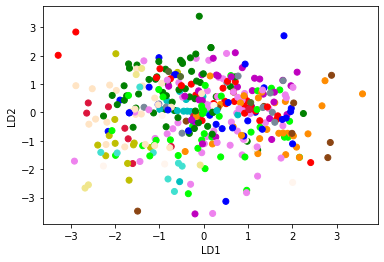

In [28]:
color_list=["red","violet","blue","g","c","m","y","b","bisque","darkorange","lime","crimson","lightslategrey","saddlebrown","seashell","turquoise","khaki","darkolivegreen"]
color_dict={}
x=0
for type in pure_df["type1"].unique():
    color_dict[type]=color_list[x]
    x+=1
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=pure_df["type1"].map(color_dict),
)

In [29]:
X = df.iloc[:, 5:11].values
y = df.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X, y)
pca_var_ratios = pca.explained_variance_ratio_
n=select_n_components(pca_var_ratios, 0.95)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components=n)

In [31]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  6  0  2  0  0  3]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  8]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  2  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  1  0  0  9]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 2  0  0  0  0  0  1  0  0  0  0  0  2  0  1  0  0 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0  1  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0

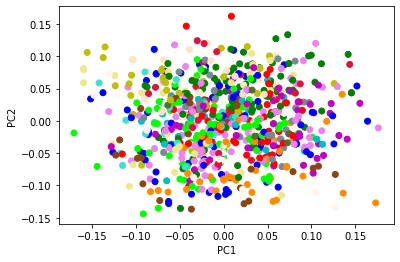

In [34]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=df["type1"].map(color_dict)
)

In [35]:
X = df.iloc[:, 5:11].values
X_train, X_test = train_test_split(X,test_size=0.2)

In [36]:
scores = {}
scale = StandardScaler()
StdScale = scale.fit_transform(X)
max_clusters=10
for i in range(2,max_clusters+1):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(StdScale)
    db_index = calinski_harabasz_score(X, labels)
    scores.update({i: db_index})
n=max(scores, key=scores.get)

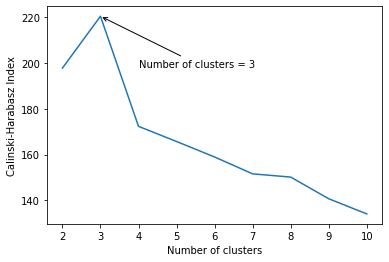

In [37]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.annotate(f"Number of clusters = {n}", xy=(n, scores[n]), xytext=(n+1, scores[n]*.9), arrowprops=dict(arrowstyle="->"))
plt.show()

In [38]:
kmeans = KMeans(n_clusters = n, init="k-means++")
kmeans.fit(StdScale)
df["cluster"] = kmeans.labels_

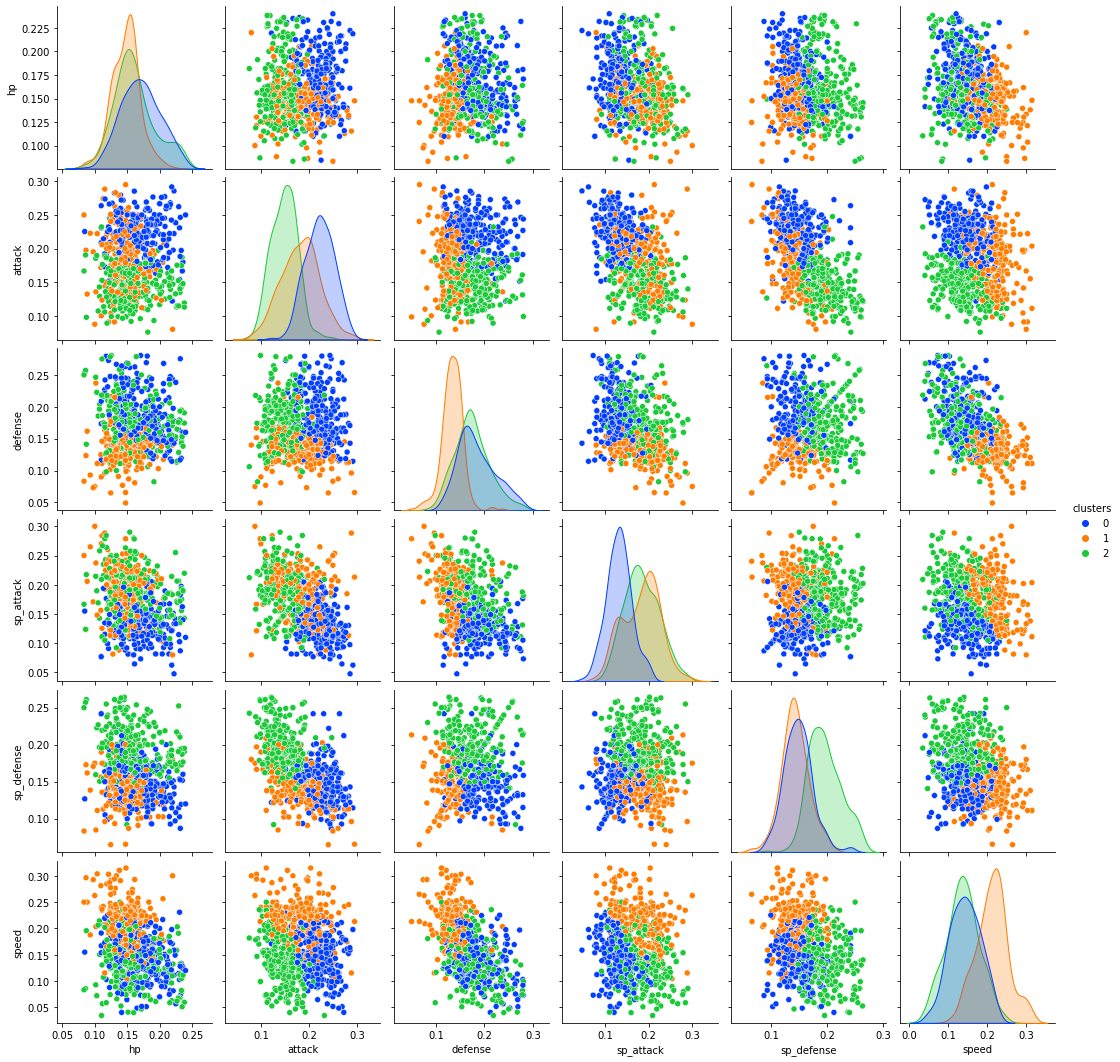

In [39]:
sns.pairplot(df[['hp', 'attack', 'defense','sp_attack', 'sp_defense', 'speed', "cluster"]], hue = "cluster",palette="bright",)

Text(0, 0.5, 'Proportion')

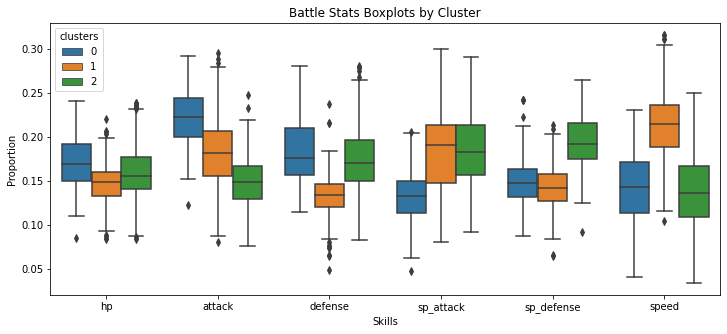

In [40]:
cluster_box_plots = pd.melt(df, id_vars = [
    "number", 
    "name", 
    "type1", 
    "type2", 
    "generation",
    "cluster"
    ], value_vars = [
    'hp', 'attack', 'defense','sp_attack', 'sp_defense', 'speed'   
])
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", hue = "cluster", data=cluster_box_plots)
plt.title("Battle Stats Boxplots by Cluster")
plt.xlabel("Skills")
plt.ylabel("Proportion")

In [41]:
col_means=df.groupby(['cluster']).mean()
col_means=col_means[cols]

In [42]:
col_means

,hp,attack,defense,sp_attack,sp_defense,speed
clusters,,,,,,
0,0.170824,0.221910,0.184312,0.132065,0.148019,0.143155
1,0.147688,0.181951,0.132799,0.182629,0.142434,0.212498
2,0.160772,0.148321,0.174277,0.184232,0.195932,0.136467


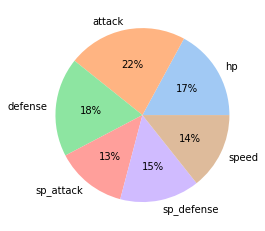

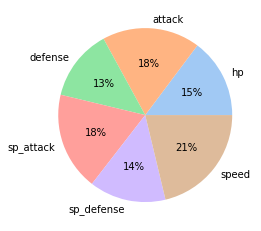

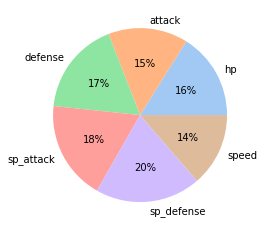

In [43]:
colors = sns.color_palette('pastel')[0:6]
for index, row in col_means.iterrows():
    plt.pie(row, labels = cols, colors = colors, autopct='%.0f%%')
    plt.show()